## Importing necessary libraries

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [58]:
df = pd.read_csv('clean_data.csv')
df.head(3)

,Employee Name,ID,Gender,Age,Married,Role,Salary,Position,Absences,Projects_Completed,...,Moral,Stress & Burnout Score,Ongoing_Project_Count,Projects_Within_Deadline,Project_Start_Date,Project_Description,Project_Difficulty,Project_Deadline,Manager_ID,Completion_Time
0,Ram Prasad,1,Male,34,Married,Backend Developer,"2,60,000",Senior,2,42,...,Very High,3,3,22,5/2/2024,Design an efficient algorithm for data process...,High,15/3/2024,4,37
1,Neeraj Joshi,2,Male,58,Married,Backend Developer,"3,00,000",Senior,8,59,...,High,1,4,50,19/06/2022,Develop a secure user registration and login s...,High,10/07/2022,4,16
2,Shilpa Pathak,3,Female,41,Married,Backend Developer,"3,00,000",Senior,10,68,...,Very High,2,5,24,5/6/2023,Design and implement database structure for ma...,High,15/7/2023,4,38


## Data Preprocessing

In [59]:
## remove employee name & joining year

cols = ['Employee Name', 'Joining_Year','ID']
df = df.drop(columns=cols)

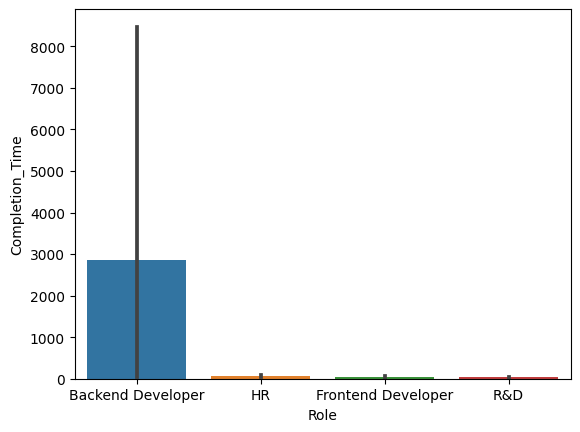

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x = 'Role',y = 'Completion_Time' ,data = df)
plt.show()

In [61]:
# Time Allotted - Deadline Date - Start Date

try:
  df['Project_Start_Date'] = pd.to_datetime(df['Project_Start_Date'], format='%d/%m/%y')
  df['Project_Deadline'] = pd.to_datetime(df['Project_Deadline'], format='%d/%m/%y')
except:
  df['Project_Start_Date'] = pd.to_datetime(df['Project_Start_Date'], format='%d/%m/%Y',errors='coerce')
  df['Project_Deadline'] = pd.to_datetime(df['Project_Deadline'], format='%d/%m/%Y',errors='coerce')

df['Time_Allotted'] = (df['Project_Deadline'] - df['Project_Start_Date']).dt.days
df['Time_Allotted'] = df['Time_Allotted'].abs()

In [62]:
cols = ['Project_Start_Date','Project_Deadline']
df = df.drop(columns=cols)

In [63]:
## Label Encoding

categorical_columns = ['Gender', 'Married', 'Role', 'Position', 'Moral', 'Project_Difficulty']
for col in categorical_columns:
    df[col] = pd.factorize(df[col])[0]

In [64]:
df.head()

,Gender,Age,Married,Role,Salary,Position,Absences,Projects_Completed,Mean Monthly Hours,Years in the company,Current_Employ_Rating,Moral,Stress & Burnout Score,Ongoing_Project_Count,Projects_Within_Deadline,Project_Description,Project_Difficulty,Manager_ID,Completion_Time,Time_Allotted
0,0,34,0,0,"2,60,000",0,2,42,143,5,9,0,3,3,22,Design an efficient algorithm for data process...,0,4,37,39.0
1,0,58,0,0,"3,00,000",0,8,59,201,17,5,1,1,4,50,Develop a secure user registration and login s...,0,4,16,21.0
2,1,41,0,0,"3,00,000",0,10,68,198,16,7,0,2,5,24,Design and implement database structure for ma...,0,4,38,40.0
3,1,34,0,1,"1,10,000",0,6,23,201,12,8,1,1,4,8,Develop and implement employee wellness progra...,1,2,4,6.0
4,1,25,0,1,"1,20,000",1,1,22,145,1,9,1,5,1,8,Working with Line Managers to implement and ev...,1,2,36,39.0


In [65]:
df['Salary'] = df['Salary'].str.replace(',', '').astype(int)

In [66]:
## Project_Description (Text Preprocessing)

In [67]:
# !pip install nltk
# import nltk
# nltk.download('punkt')
# nltk.download('stopwords')

# df['Project_Description'] = df['Project_Description'].apply(lambda x: word_tokenize(x.lower()))

## Remove stopwords
# stop_words = set(stopwords.words('english'))
# df['Project_Description'] = df['Project_Description'].apply(lambda x: [word for word in x if word.isalnum() and word not in stop_words])

# df['Project_Description'] = df['Project_Description'].apply(lambda x: ' '.join(x))

## Features

In [68]:
numerical_features = ['Age', 'Salary','Mean Monthly Hours', 'Absences',
                       'Ongoing_Project_Count','Projects_Within_Deadline','Projects_Completed']

categorical_features = ['Gender', 'Current_Employ_Rating', 'Role','Position', 'Moral', 'Stress & Burnout Score','Project_Difficulty','Manager_ID']

text_features = ['Project_Description']

target_variable = ['Completion_Time']

In [69]:
## Normalising the numerical values

scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [70]:
features = numerical_features + categorical_features + text_features
target = df['Completion_Time']
df = df.drop(columns=['Completion_Time','Project_Description'])

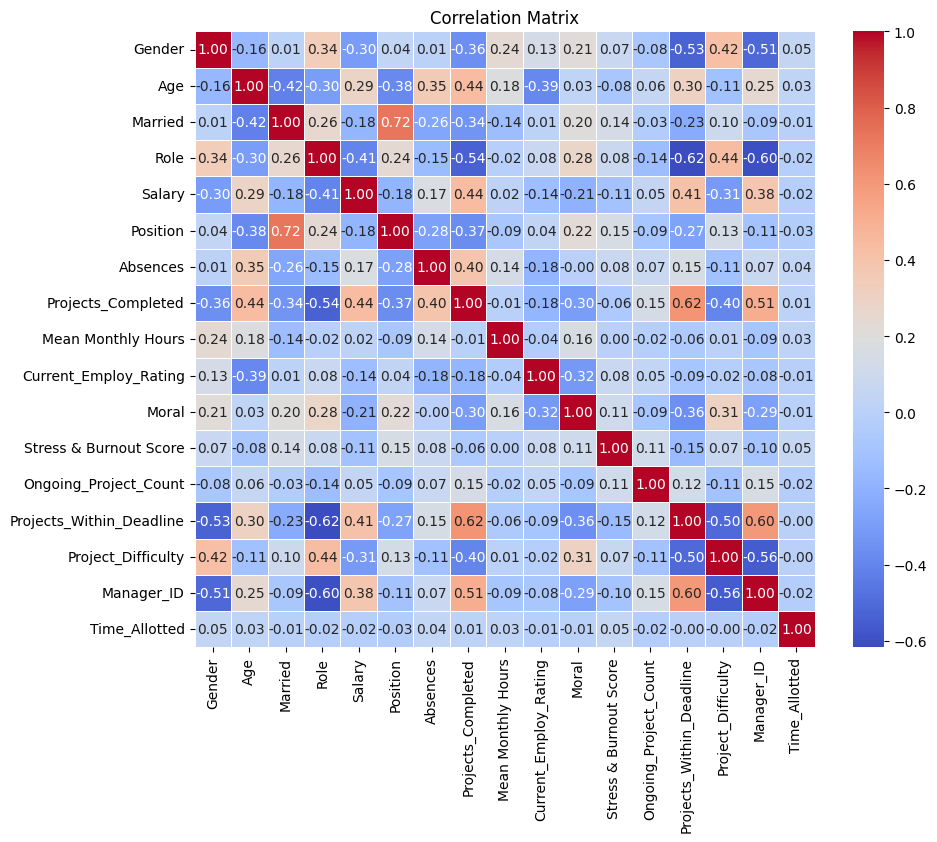

DataFrame after removing correlated features:
Index(['Gender', 'Age', 'Married', 'Role', 'Salary', 'Position', 'Absences',
       'Projects_Completed', 'Mean Monthly Hours', 'Current_Employ_Rating',
       'Moral', 'Stress & Burnout Score', 'Ongoing_Project_Count',
       'Projects_Within_Deadline', 'Project_Difficulty', 'Manager_ID',
       'Time_Allotted'],
      dtype='object')


In [74]:
## Remove the highly correlated features

correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

correlation_threshold = 0.8

highly_correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated_features.add(colname)

df = df.drop(highly_correlated_features, axis=1)

print("DataFrame after removing correlated features:")
print(df.columns)

In [81]:
## Train Test Split

cols = ['Age','Salary','Mean Monthly Hours','Absences','Ongoing_Project_Count','Projects_Within_Deadline','Current_Employ_Rating', 'Role','Position','Moral','Stress & Burnout Score','Project_Difficulty']
X = df
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (402, 17)
X_test shape: (135, 17)
y_train shape: (402,)
y_test shape: (135,)


In [82]:
## XGBoost Regressor
import math

xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

y_pred = xgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 57208.860770081454
